# [Object Detection](https://nuggy875.tistory.com/20)
- [Object Detection Github](https://github.com/hoya012/deep_learning_object_detection)

## Object Detection이란?
- 여러 물체에 대해 어떤 물체인지 분류하는 `Classification 문제`와 그 물체가 어디 있는지 박스를 통해(Bounding Box) 위치 정보를 나타내는 `Localization 문제`를 둘 다 해내야 하는 분야를 뜻합니다.

즉, Object Detection = 여러가지 물체에 대한 Classification + 물체의 위치정보를 파악하는 Localization


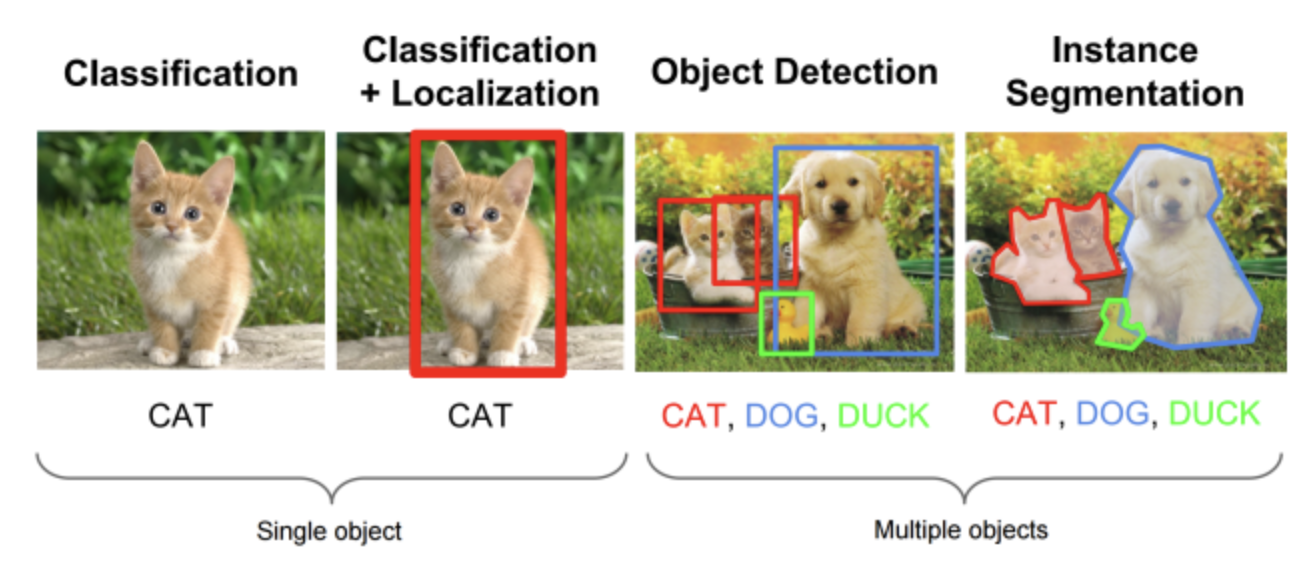

## Object Detection 발전 흐름
- Deep Learning을 이용한 Object Detection은 크게 1-stage Detector와 2-stage Detector로 나눌 수 있습니다.
- 가운데 수평 화살표를 기준으로 위 쪽 논문들이 2-stage Detector 논문들이고,


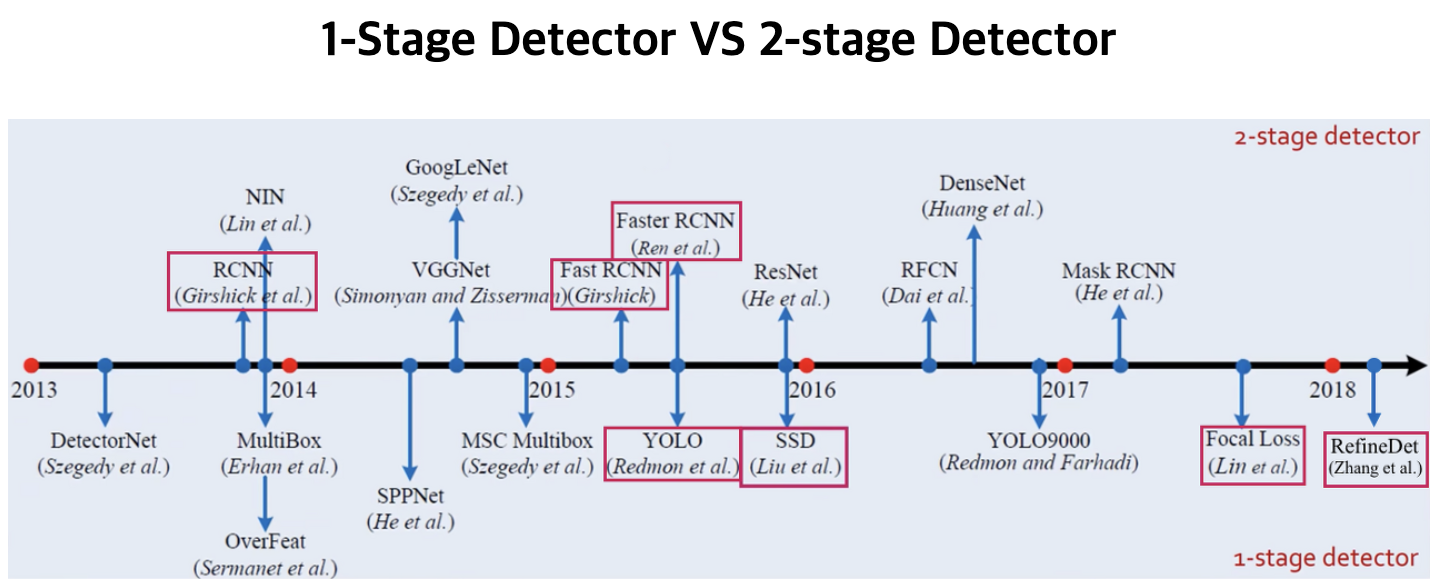

### 1-stage Detector 특징
- Localization 문제와 Classification 문제를 동시에 행하는 방법
- 비교적 빠르지만 정확도가 낮음

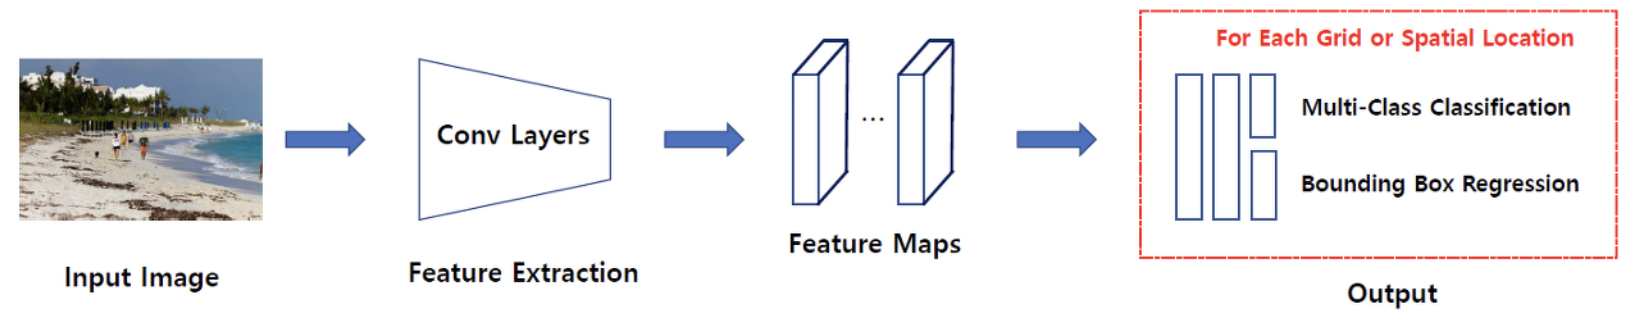

### 2-stage Detector 특징
- Localization 문제와 Classification 문제를 순차적으로 행하는 방법
- 비교적 느리지만 정확도가 높음

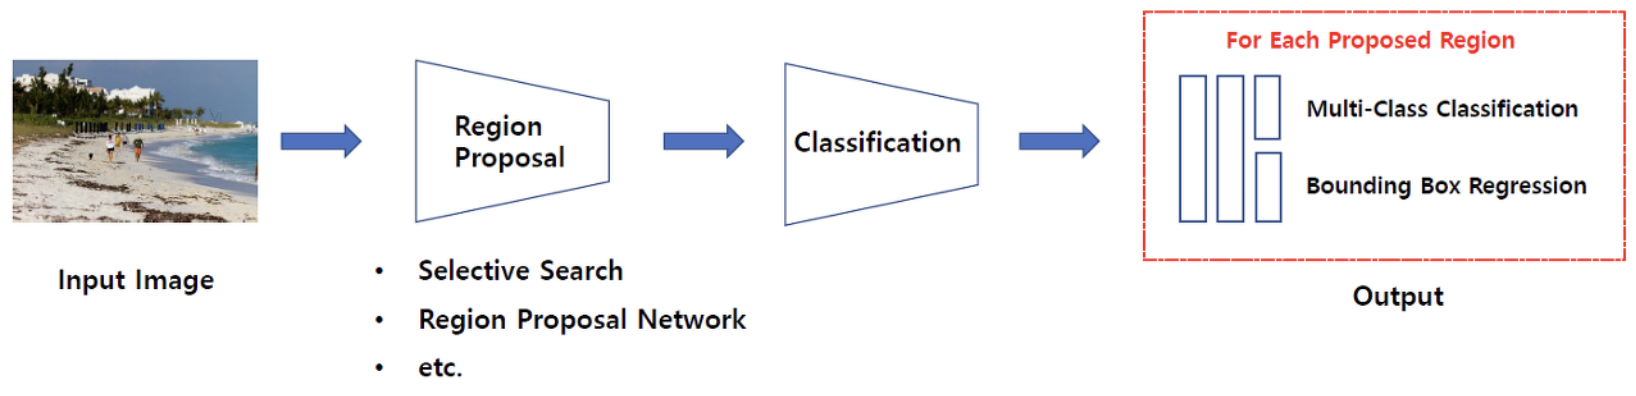

## [Object Detection Models](https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch1-Object-Detection.html)

### R-CNN
- R-CNN은 Selective Search를 이용해 이미지에 대한 후보영역(Region Proposal)을 생성합니다.
- 생성된 각 후보영역을 고정된 크기로 wrapping하여 CNN의 input으로 사용합니다.
- CNN에서 나온 Feature map으로 SVM을 통해 분류, Regressor을 통해 Bounding-box를 조정합니다.
- 강제로 크기를 맞추기 위한 wrapping으로 이미지의 변형이나 손실이 일어나고 후보영역만큼 CNN을 돌려야하하기 때문에 큰 저장공간을 요구하고 느리다는 단점이 있습니다.



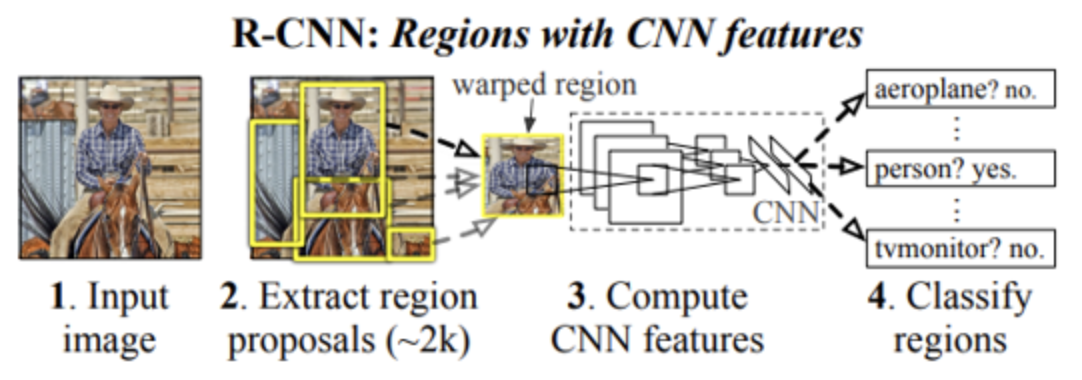

### Fast R-CNN
- 각 후보영역에 CNN을 적용하는 R-CNN과 달리 이미지 전체에 CNN을 적용하여 생성된 Feature map에서 후보영역을 생성합니다.
- 생성된 후보영역은 RoI Pooling을 통해 고정 사이즈의 Feature vector로 추출합니다.
- Feature vector에 FC layer를 거쳐 Softmax를 통해 분류, Regressor를 통해 Bounding-box를 조정합니다.



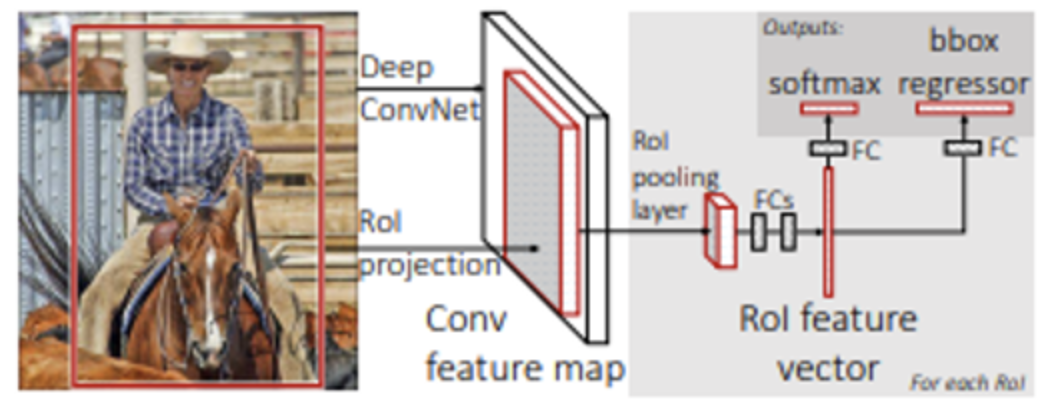

### Faster R-CNN
- Selective Search 부분을 딥러닝으로 바꾼 Region Proposal Network(RPN)을 사용합니다.
- RPN은 Feature map에서 CNN 연산시 sliding-window가 찍은 지점마다 Anchor-box로 후보영역을 예측합니다.
- Anchor-box란 미리 지정해놓은 여러 개의 비율과 크기의 Bounding-box입니다.
- RPN에서 얻은 후보영역을 IoU순으로 정렬하여 Non-Maximum Suppression(NMS) 알고리즘을 통해 최종 후보영역을 선택합니다.
- 선택된 후보영역의 크기를 맞추기 위해 RoI Pooling을 거치고 이후 Fast R-CNN과 동일하게 진행합니다.

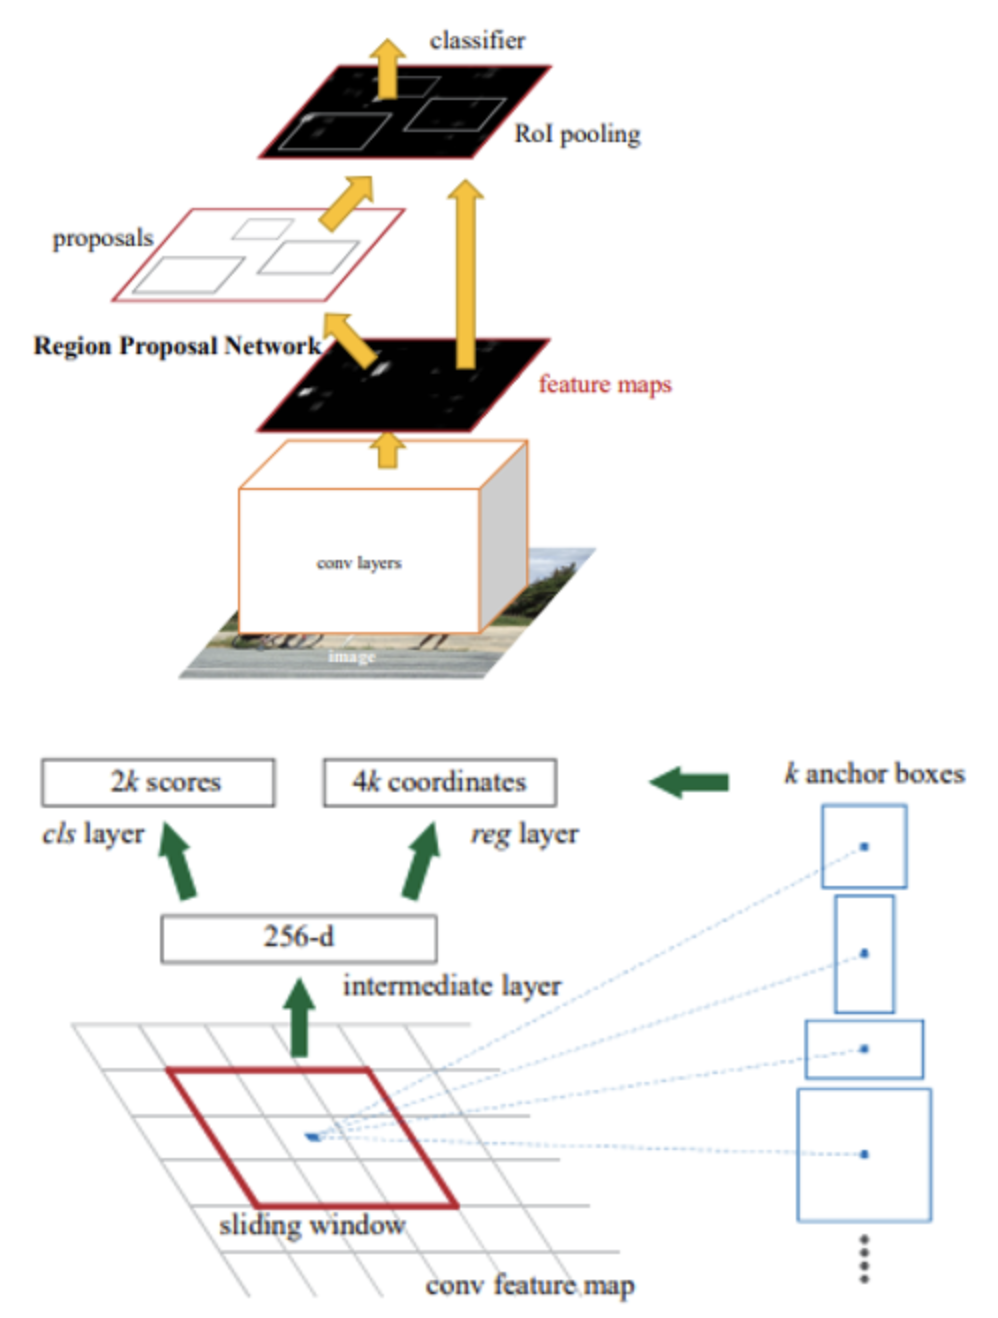

### YOLO
- Bouning-box와 Class probability를 하나의 문제로 간주하여 객체의 종류와 위치를 한번에 예측합니다.
- 이미지를 일정 크기의 그리드로 나눠 각 그리드에 대한 Bounding-box를 예측합니다.
- Bounding-box의 confidence score와 그리드셀의 class score의 값으로 학습하게 됩니다.
- 간단한 처리과정으로 속도가 매우 빠르지만 작은 객체에 대해서는 상대적으로 정확도가 낮습니다.

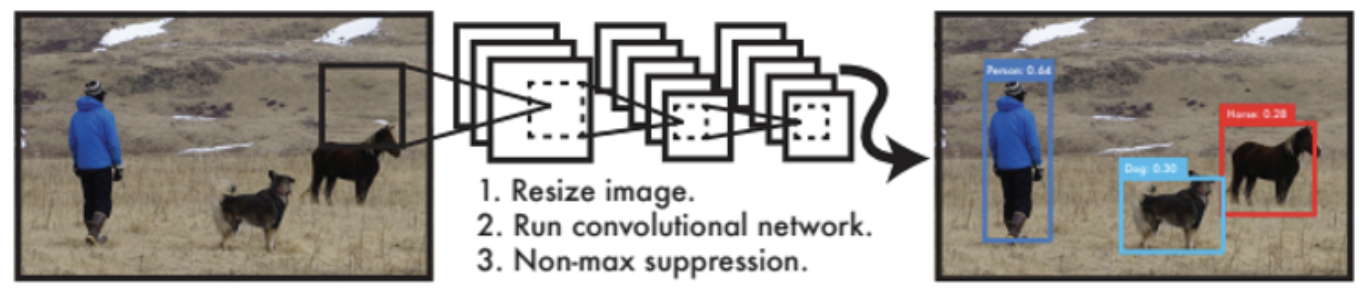

### SSD
- 각 Covolutional Layer 이후에 나오는 Feature map마다 Bounding-box의 Class 점수와 Offset(위치좌표)를 구하고, NMS 알고리즘을 통해 최종 Bounding-box를 결정합니다.
- 이는 각 Feature map마다 스케일이 다르기 때문에 작은 물체와 큰 물체를 모두 탐지할 수 있다는 장점이 있습니다.

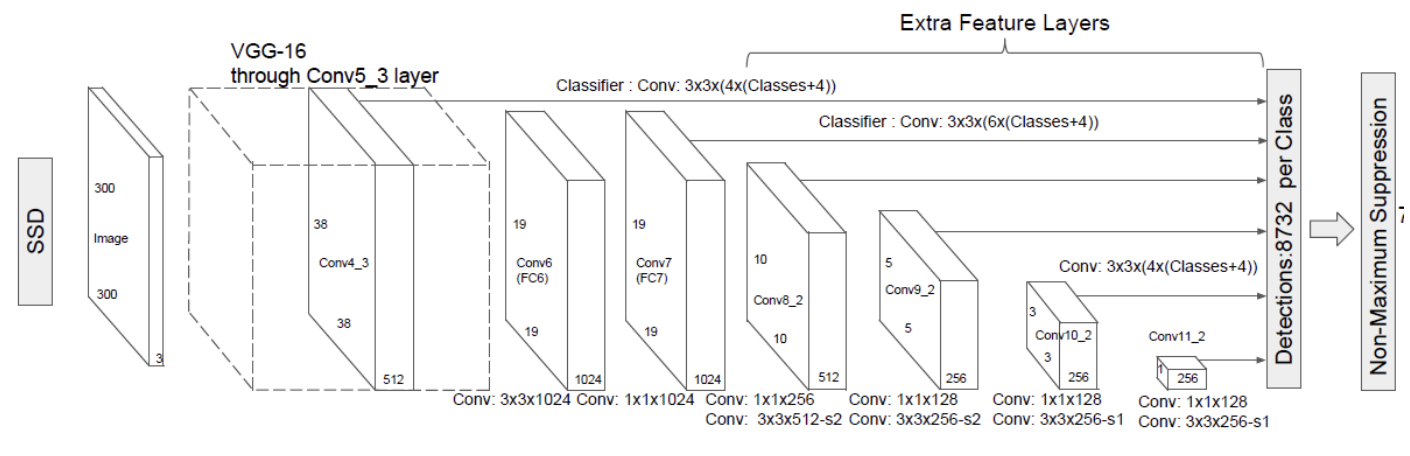

### RetinaNet
- RetinaNet은 모델 학습시 계산하는 손실 함수(loss function)에 변화를 주어 기존 One-Stage Detector들이 지닌 낮은 성능을 개선했습니다.
- One-Stage Detector는 많게는 십만개 까지의 후보군 제시를 통해 학습을 진행합니다.
- 그 중 실제 객체인 것은 일반적으로 10개 이내 이고, 다수의 후보군이 background 클래스로 잡힙니다.
- 상대적으로 분류하기 쉬운 background 후보군들에 대한 loss값을 줄여줌으로써 분류하기 어려운 실제 객체들의 loss 비중을 높이고, 그에 따라 실제 객체들에 대한 학습에 집중하게 합니다.
- RetinaNet은 속도 빠르면서 Two-Stage Detector와 유사한 성능을 보입니다

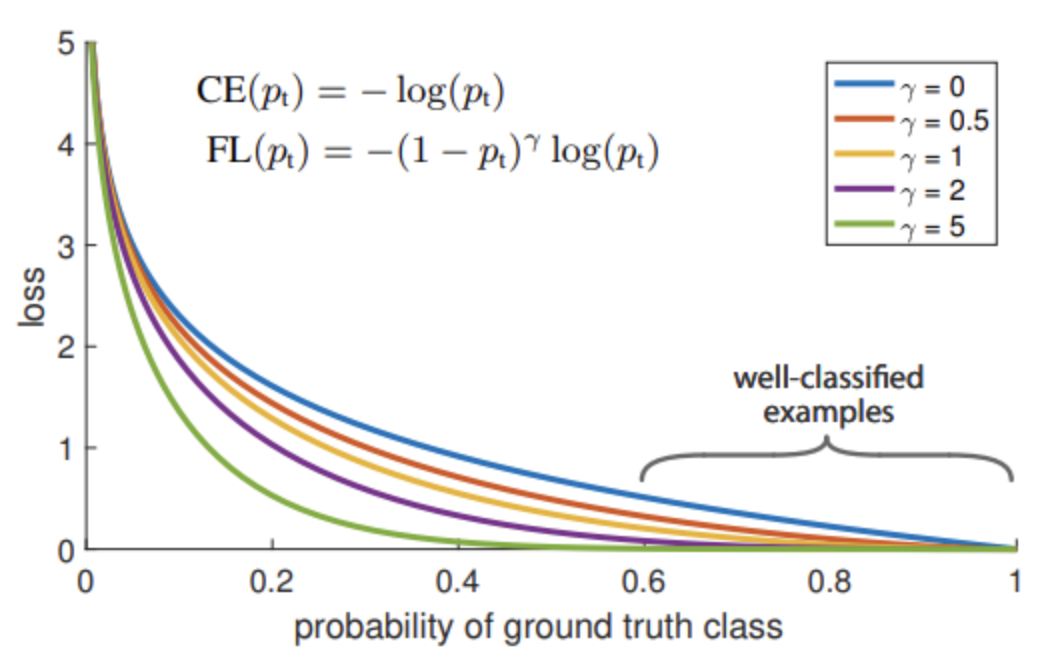

# 2-stage Detector 예제

## [Data](https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch2-EDA.html)

In [ ]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils
!python Tutorial-Book-Utils/PL_data_loader.py --data FaceMaskDetection
!unzip -q Face\ Mask\ Detection.zip

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (45/45), 11.62 KiB | 3.87 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Downloading...
From (original): https://drive.google.com/uc?id=16Gzn1w38yZLJpzmzKcRIRveFeHZtCEr7
From (redirected): https://drive.google.com/uc?id=16Gzn1w38yZLJpzmzKcRIRveFeHZtCEr7&confirm=t&uuid=d46ee562-5724-4d53-a5ab-f45e29dc225f
To: /content/Face Mask Detection.zip
100% 417M/417M [00:13<00:00, 31.0MB/s]
Face Mask Detection.zip download complete!


### 바운딩 박스 도식화
- 딥러닝 모델 정확도를 높이기 위해 중요한 것은 데이터셋 검증입니다.
- 지도학습은 레이블링(labeling) 된 데이터로 모델이 학습을 하기 때문에 올바르게 레이블링 된 데이터임을 확인하는 것이 중요합니다.
- 이번 절에서는 주어진 이미지에 바운딩 박스를 시각화해 올바르게 레이블링이 된 데이터인지 확인해보겠습니다.

In [ ]:
def generate_box(obj):

    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)

    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0


def generate_target(file):
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        return target

def plot_image(img_path, annotation):

    img = mpimg.imread(img_path)

    fig,ax = plt.subplots(1)
    ax.imshow(img)


    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        elif annotation['labels'][idx] == 1 :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')

        else :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

import torch

In [ ]:
img_list = sorted(glob.glob('images/*'))
annot_list = sorted(glob.glob('annotations/*'))

len(img_list), len(annot_list)

(853, 853)

In [ ]:
img_list[:5], annot_list[:5]

(['images/maksssksksss0.png',
  'images/maksssksksss1.png',
  'images/maksssksksss10.png',
  'images/maksssksksss100.png',
  'images/maksssksksss101.png'],
 ['annotations/maksssksksss0.xml',
  'annotations/maksssksksss1.xml',
  'annotations/maksssksksss10.xml',
  'annotations/maksssksksss100.xml',
  'annotations/maksssksksss101.xml'])

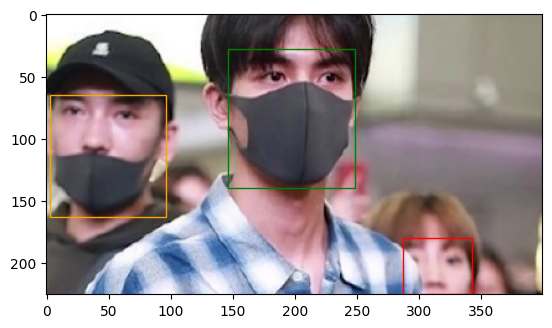

In [ ]:
bbox = generate_target(annot_list[232])
plot_image(img_list[232], bbox)

In [ ]:
bbox

{'boxes': tensor([[  3.,  65.,  96., 163.],
         [146.,  28., 249., 140.],
         [287., 180., 343., 225.]]),
 'labels': tensor([2, 1, 0])}

### 데이터 분리


In [ ]:
import os
import random
import numpy as np
import shutil

print(len(os.listdir('annotations')))
print(len(os.listdir('images')))

!mkdir test_images
!mkdir test_annotations

853
853


In [ ]:
random.seed(1234)
idx = random.sample(range(853), 170)

for img in np.array(sorted(os.listdir('images')))[idx]:
    shutil.move('images/'+img, 'test_images/'+img)

for annot in np.array(sorted(os.listdir('annotations')))[idx]:
    shutil.move('annotations/'+annot, 'test_annotations/'+annot)

print(len(os.listdir('annotations')))
print(len(os.listdir('images')))
print(len(os.listdir('test_annotations')))
print(len(os.listdir('test_images')))

683
683
170
170


- 이미지 분류 문제에서는 훈련용 시험용 데이터를 나눈 후 이미지 개수만 확인하면 되겠지만, 객체 탐지 문제에서는 각 클래스 별로 몇 개의 객체가 데이터셋 내부에 존재하는지 확인하는 작업이 필요합니다.
- 아래 코드를 활용해 데이터셋 내부에 있는 클래스별 객체 수를 확인해보겠습니다.

In [ ]:
annot_list = sorted(glob.glob('annotations/*'))
test_annot_list = sorted(glob.glob('test_annotations/*'))

len(annot_list), len(test_annot_list)

(683, 170)

In [ ]:
from tqdm import tqdm
import pandas as pd
from collections import Counter

def get_num_objects_for_each_class(data_list):

    total_labels = []

    for data in tqdm(data_list):
        bbox = generate_target(data)
        total_labels += [int(i) for i in bbox['labels']]

    return Counter(total_labels)

train_objects = get_num_objects_for_each_class(annot_list)
test_objects = get_num_objects_for_each_class(test_annot_list)

print('\n train 데이터에 있는 객체', train_objects)
print('\n test 데이터에 있는 객체', test_objects)

100%|██████████| 170/170 [00:00<00:00, 338.86it/s]


 train 데이터에 있는 객체 Counter({1: 2691, 0: 532, 2: 97})

 test 데이터에 있는 객체 Counter({1: 541, 0: 185, 2: 26})


## [Faster R-CNN](https://pseudo-lab.github.io/Tutorial-Book/chapters/object-detection/Ch5-Faster-R-CNN.html)

In [ ]:
import os
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import Image
import torchvision
from torchvision import transforms, datasets, models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import time

In [ ]:
def generate_box(obj):

    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)

    return [xmin, ymin, xmax, ymax]

adjust_label = 1

def generate_label(obj):

    if obj.find('name').text == "with_mask":

        return 1 + adjust_label

    elif obj.find('name').text == "mask_weared_incorrect":

        return 2 + adjust_label

    return 0 + adjust_label

def generate_target(file):
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        return target

def plot_image_from_output(img, annotation):

    img = img.cpu().permute(1,2,0)

    fig,ax = plt.subplots(1)
    ax.imshow(img)

    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 1 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        elif annotation['labels'][idx] == 2 :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')

        else :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

### Dataset and DataLoader

In [ ]:
class MaskDataset(object):
    def __init__(self, transforms, path):
        '''
        path: path to train folder or test folder
        '''
        # transform module과 img path 경로를 정의
        self.transforms = transforms
        self.path = path
        self.imgs = list(sorted(os.listdir(self.path)))


    def __getitem__(self, idx): #special method
        # load images ad masks
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)

        if 'test' in self.path:
            label_path = os.path.join("test_annotations/", file_label)
        else:
            label_path = os.path.join("annotations/", file_label)

        img = Image.open(img_path).convert("RGB")
        #Generate Label
        target = generate_target(label_path)

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

data_transform = transforms.Compose([  # transforms.Compose : list 내의 작업을 연달아 할 수 있게 호출하는 클래스
        transforms.ToTensor() # ToTensor : numpy 이미지에서 torch 이미지로 변경
    ])

def collate_fn(batch):
    return tuple(zip(*batch))

dataset = MaskDataset(data_transform, 'images/')
test_dataset = MaskDataset(data_transform, 'test_images/')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=collate_fn)

### Pre-trained Model

In [ ]:
def get_model_instance_segmentation(num_classes):

    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [ ]:
model = get_model_instance_segmentation(4)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 224MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

### Engine

In [ ]:
def Total_loss(loss):
    loss_objectness = loss['loss_objectness']
    loss_rpn_box_reg = loss['loss_rpn_box_reg']
    loss_classifier = loss['loss_classifier']
    loss_box_reg = loss['loss_box_reg']

    rpn_total = loss_objectness + 10*loss_rpn_box_reg  #(람다라고 보면된다)
    fast_rcnn_total = loss_classifier + 1*loss_box_reg

    total_loss = rpn_total + fast_rcnn_total

    return total_loss


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss = 0

    # Loop through data loader data batches
    for batch, (imgs, annotations) in enumerate(dataloader):
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]

        # 1. Forward pass
        loss_dict = model(imgs, annotations)

        total_loss = loss_fn(loss_dict)

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        train_loss += total_loss.item()

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    return train_loss

### [Training](https://kubig-2022-2.tistory.com/79)

In [ ]:
num_epochs = 10
params = [p for p in model.parameters() if p.requires_grad]

In [ ]:
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.001, momentum=0.9, weight_decay = 0.0005) # SGD optimizer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=0.00001)

In [ ]:
print('----------------------train start--------------------------')
for epoch in tqdm(range(num_epochs)):
    train_loss = train_step(model=model,
                            dataloader=data_loader,
                            loss_fn=Total_loss,
                            optimizer=optimizer)
    scheduler.step()

    print(
        f" Epoch: {epoch+1} | "
        f" train_loss: {train_loss:.4f} | "
    )

----------------------train start--------------------------


 10%|█         | 1/10 [02:07<19:06, 127.36s/it]

 Epoch: 1 |  train_loss: 0.6565 | 


 20%|██        | 2/10 [04:11<16:43, 125.44s/it]

 Epoch: 2 |  train_loss: 0.4027 | 


 30%|███       | 3/10 [06:15<14:34, 124.90s/it]

 Epoch: 3 |  train_loss: 0.3365 | 


 40%|████      | 4/10 [08:20<12:28, 124.68s/it]

 Epoch: 4 |  train_loss: 0.2981 | 


 50%|█████     | 5/10 [10:24<10:22, 124.45s/it]

 Epoch: 5 |  train_loss: 0.2737 | 


 60%|██████    | 6/10 [12:28<08:17, 124.38s/it]

 Epoch: 6 |  train_loss: 0.2580 | 


 70%|███████   | 7/10 [14:32<06:13, 124.40s/it]

 Epoch: 7 |  train_loss: 0.2388 | 


 80%|████████  | 8/10 [16:36<04:08, 124.32s/it]

 Epoch: 8 |  train_loss: 0.2271 | 


 90%|█████████ | 9/10 [18:41<02:04, 124.35s/it]

 Epoch: 9 |  train_loss: 0.2188 | 


100%|██████████| 10/10 [20:45<00:00, 124.58s/it]

 Epoch: 10 |  train_loss: 0.2148 | 


### Prediction

In [ ]:
def make_prediction(model, img, threshold=0.5):
    model.eval()
    preds = model(img)
    for id in range(len(preds)) :
        idx_list = []

        for idx, score in enumerate(preds[id]['scores']) :
            if score > threshold:
                idx_list.append(idx)

        preds[id]['boxes'] = preds[id]['boxes'][idx_list].cpu()
        preds[id]['labels'] = preds[id]['labels'][idx_list].cpu()
        preds[id]['scores'] = preds[id]['scores'][idx_list].cpu()

    return preds

In [ ]:
with torch.no_grad():
    # 테스트셋 배치사이즈= 2
    for imgs, annotations in test_data_loader:
        imgs = list(img.to(device) for img in imgs)

        pred = make_prediction(model, imgs, 0.5)
        print(pred)
        break

[{'boxes': tensor([[216.2630,  60.9599, 252.7831,  96.4025],
        [117.7138,   2.7174, 132.7977,  18.0510]]), 'labels': tensor([2, 2]), 'scores': tensor([0.9758, 0.9043])}, {'boxes': tensor([[219.4733,  99.5401, 257.1295, 138.5862],
        [130.8255, 108.7186, 178.0530, 152.3467],
        [303.4151, 130.8835, 330.4207, 157.3306],
        [ 40.6089, 109.7923,  65.0907, 140.0032],
        [164.7448,  91.1422, 179.6654, 107.4989],
        [ 82.6677,  87.5477,  95.1234, 110.4525],
        [ 29.3838,  89.8113,  44.8293, 104.2308],
        [ 83.0792,  84.7200,  95.1281,  97.0543],
        [104.0252,  89.3156, 115.5222, 107.1998],
        [  2.1218, 105.3533,  21.3058, 125.2798],
        [  1.6990, 104.5185,  21.2500, 126.8770],
        [113.9713,  81.6655, 131.7356, 101.9865],
        [258.1562,  90.4123, 268.6493, 101.1017]]), 'labels': tensor([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1]), 'scores': tensor([0.9958, 0.9885, 0.9863, 0.9861, 0.9592, 0.9549, 0.9507, 0.9025, 0.8996,
        0.724

In [ ]:
font = {'family': 'serif',
      'color':  'blue',
      'weight': 'bold',
      'size': 9}

In [ ]:
def plot_image_from_output(img, annotation):

    img = img.cpu().permute(1,2,0)

    fig,ax = plt.subplots(1)
    ax.imshow(img)

    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]
        if "scores" in annotation.keys():
          plt.text(xmin, ymin, f'score: {round(annotation["scores"][idx].item(), 2)}', fontdict=font)

        if annotation['labels'][idx] == 1 :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        elif annotation['labels'][idx] == 2 :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')

        else :

            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

Target :  tensor([1, 1, 1, 2, 2, 1, 1, 1])


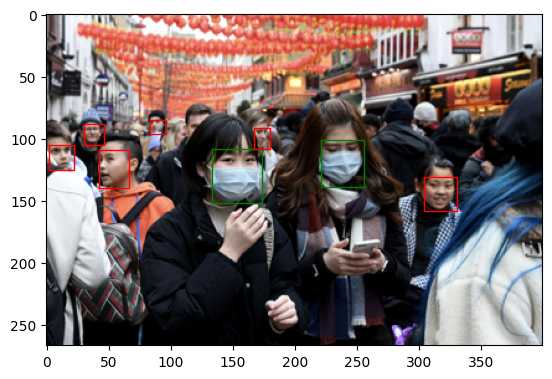

Prediction :  tensor([2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1])


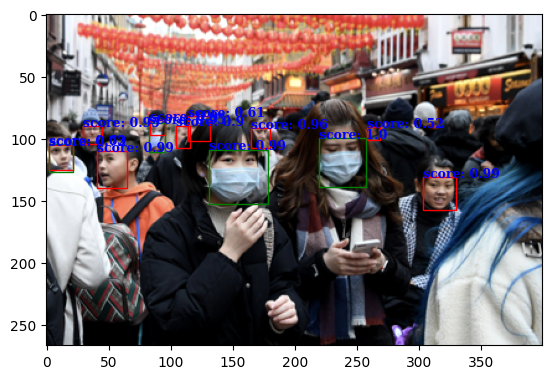

In [ ]:
_idx = 1
print("Target : ", annotations[_idx]['labels'])
plot_image_from_output(imgs[_idx], annotations[_idx])
print("Prediction : ", pred[_idx]['labels'])
plot_image_from_output(imgs[_idx], pred[_idx])

In [ ]:
from tqdm import tqdm

labels = []
preds_adj_all = []
annot_all = []

for im, annot in tqdm(test_data_loader, position = 0, leave = True):
    im = list(img.to(device) for img in im)
    #annot = [{k: v.to(device) for k, v in t.items()} for t in annot]

    for t in annot:
        labels += t['labels']

    with torch.no_grad():
        preds_adj = make_prediction(model, im, 0.5)
        preds_adj = [{k: v.to(torch.device('cpu')) for k, v in t.items()} for t in preds_adj]
        preds_adj_all.append(preds_adj)
        annot_all.append(annot)

100%|██████████| 85/85 [00:14<00:00,  6.00it/s]


In [ ]:
%cd Tutorial-Book-Utils/
import utils_ObjectDetection as utils

/content/Tutorial-Book-Utils


In [ ]:
sample_metrics = []
for batch_i in range(len(preds_adj_all)):
    sample_metrics += utils.get_batch_statistics(preds_adj_all[batch_i], annot_all[batch_i], iou_threshold=0.5)

true_positives, pred_scores, pred_labels = [torch.cat(x, 0) for x in list(zip(*sample_metrics))]  # 배치가 전부 합쳐짐
precision, recall, AP, f1, ap_class = utils.ap_per_class(true_positives, pred_scores, pred_labels, torch.tensor(labels))
mAP = torch.mean(AP)
print(f'mAP : {mAP}')
print(f'AP : {AP}')

mAP : 0.5973024558907095
AP : tensor([0.8478, 0.9441, 0.0000], dtype=torch.float64)


# 1-stage Detector 예제

## YOLOv5 구현(생략)
- [Windows에서의 YOLOv5 객체 검출(단계별 튜토리얼)](https://wandb.ai/wandb_fc/korean/reports/Windows-YOLOv5---VmlldzoxODc3MjE1?galleryTag=beginner)
- [PyTorch에서 YOLOv5 객체 감지 모델을 트레이닝하기 위한 이미지 수집 및 레이블 지정](https://wandb.ai/wandb_fc/korean/reports/PyTorch-YOLOv5---VmlldzoxODc3Mzk5)

## [YOLO 사전학습](https://pytorch.org/hub/ultralytics_yolov5/)

*Author: Ultralytics*

**Ultralytics YOLOv5 🚀 for object detection, instance segmentation and image classification.**

_ | _
- | -
![alt](https://pytorch.org/assets/images/ultralytics_yolov5_img1.png) | ![alt](https://pytorch.org/assets/images/ultralytics_yolov5_img2.png)


### Before You Start

Start from a **Python>=3.8** environment with **PyTorch>=1.7** installed. To install PyTorch see [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/). To install YOLOv5 dependencies:

In [ ]:
%%bash
pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 14.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

### Model Description

<img width="800" alt="YOLO Model Comparison" src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/yolo-comparison-plots.png">

Ultralytics YOLOv5 🚀 is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLOv5 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection, instance segmentation and image classification tasks.

We hope that the resources here will help you get the most out of YOLOv5. Please browse the YOLOv5 [Docs](https://docs.ultralytics.com/yolov5) for details, raise an issue on [GitHub](https://github.com/ultralytics/yolov5/issues/new/choose) for support, and join our [Discord](https://discord.gg/n6cFeSPZdD) community for questions and discussions!

| Model                                                                                           | size<br><sup>(pixels) | mAP<sup>val<br>50-95 | mAP<sup>val<br>50 | Speed<br><sup>CPU b1<br>(ms) | Speed<br><sup>V100 b1<br>(ms) | Speed<br><sup>V100 b32<br>(ms) | params<br><sup>(M) | FLOPs<br><sup>@640 (B) |
|-------------------------------------------------------------------------------------------------|-----------------------|----------------------|-------------------|------------------------------|-------------------------------|--------------------------------|--------------------|------------------------|
| [YOLOv5n](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5n.pt)              | 640                   | 28.0                 | 45.7              | **45**                       | **6.3**                       | **0.6**                        | **1.9**            | **4.5**                |
| [YOLOv5s](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt)              | 640                   | 37.4                 | 56.8              | 98                           | 6.4                           | 0.9                            | 7.2                | 16.5                   |
| [YOLOv5m](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m.pt)              | 640                   | 45.4                 | 64.1              | 224                          | 8.2                           | 1.7                            | 21.2               | 49.0                   |
| [YOLOv5l](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l.pt)              | 640                   | 49.0                 | 67.3              | 430                          | 10.1                          | 2.7                            | 46.5               | 109.1                  |
| [YOLOv5x](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt)              | 640                   | 50.7                 | 68.9              | 766                          | 12.1                          | 4.8                            | 86.7               | 205.7                  |
|                                                                                                 |                       |                      |                   |                              |                               |                                |                    |                        |
| [YOLOv5n6](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5n6.pt)            | 1280                  | 36.0                 | 54.4              | 153                          | 8.1                           | 2.1                            | 3.2                | 4.6                    |
| [YOLOv5s6](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s6.pt)            | 1280                  | 44.8                 | 63.7              | 385                          | 8.2                           | 3.6                            | 12.6               | 16.8                   |
| [YOLOv5m6](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m6.pt)            | 1280                  | 51.3                 | 69.3              | 887                          | 11.1                          | 6.8                            | 35.7               | 50.0                   |
| [YOLOv5l6](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l6.pt)            | 1280                  | 53.7                 | 71.3              | 1784                         | 15.8                          | 10.5                           | 76.8               | 111.4                  |
| [YOLOv5x6](https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x6.pt)<br>+ [TTA] | 1280<br>1536          | 55.0<br>**55.8**     | 72.7<br>**72.7**  | 3136<br>-                    | 26.2<br>-                     | 19.4<br>-                      | 140.7<br>-         | 209.8<br>-             |

<details>
  <summary>Table Notes</summary>

- All checkpoints are trained to 300 epochs with default settings. Nano and Small models use [hyp.scratch-low.yaml](https://github.com/ultralytics/yolov5/blob/master/data/hyps/hyp.scratch-low.yaml) hyps, all others use [hyp.scratch-high.yaml](https://github.com/ultralytics/yolov5/blob/master/data/hyps/hyp.scratch-high.yaml).
- **mAP<sup>val</sup>** values are for single-model single-scale on [COCO val2017](http://cocodataset.org) dataset.<br>Reproduce by `python val.py --data coco.yaml --img 640 --conf 0.001 --iou 0.65`
- **Speed** averaged over COCO val images using a [AWS p3.2xlarge](https://aws.amazon.com/ec2/instance-types/p3/) instance. NMS times (~1 ms/img) not included.<br>Reproduce by `python val.py --data coco.yaml --img 640 --task speed --batch 1`
- **TTA** [Test Time Augmentation](https://docs.ultralytics.com/yolov5/tutorials/test_time_augmentation) includes reflection and scale augmentations.<br>Reproduce by `python val.py --data coco.yaml --img 1536 --iou 0.7 --augment`

</details>

### Load From PyTorch Hub

This example loads a pretrained **YOLOv5s** model and passes an image for inference. YOLOv5 accepts **URL**, **Filename**, **PIL**, **OpenCV**, **Numpy** and **PyTorch** inputs, and returns detections in **torch**, **pandas**, and **JSON** output formats. See the [YOLOv5 PyTorch Hub Tutorial](https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/) for details.

In [ ]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Images
for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
im1 = Image.open('zidane.jpg')  # PIL image
im2 = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model([im1, im2], size=640) # batch of images

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 239.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 245.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 6.6s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-22 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 376MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
100%|██████████| 165k/165k [00:00<00:00, 44.6MB/s]
100%|██████████| 476k/476k [00:00<00:00, 84.2MB/s]
image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 18.3ms pre-process, 42.6ms inference, 1.8ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs/detect/exp


xmin        ymin         xmax        ymax  confidence  class    name
0  742.897949   47.961731  1141.131470  716.866516    0.880830      0  person
1  442.038666  437.358948   496.719025  709.892639    0.687269     27     tie
2  125.248810  193.611786   710.999146  713.086426    0.641007      0  person
3  982.889648  308.421753  1027.333496  420.229370    0.263304     27     tie

In [ ]:
from PIL import Image

im = Image.open("/content/Tutorial-Book-Utils/runs/detect/exp2/image1.jpg")
im

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/exp2/image1.jpg'

In [ ]:
im = Image.open("/content/Tutorial-Book-Utils/runs/detect/exp2/zidane.jpg")
im

# [Semantic Segmentation](https://albumentations.ai/docs/examples/pytorch_semantic_segmentation/)

## Dlownload images

In [1]:
!wget -q https://github.com/albumentations-team/albumentations_examples/archive/master.zip -O /tmp/albumentations_examples.zip
!unzip -o -qq /tmp/albumentations_examples.zip -d /tmp/albumentations_examples
!cp -r /tmp/albumentations_examples/albumentations_examples-master/notebooks/images .
!echo "Images are successfully downloaded"

cp: cannot stat '/tmp/albumentations_examples/albumentations_examples-master/notebooks/images': No such file or directory
Images are successfully downloaded


## [albumentations](https://gaussian37.github.io/dl-pytorch-albumentation/)

In [2]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 36.3 MB/s eta 0:00:00
albumentations==1.4.7 is successfully installed


In [2]:
!pip install ternausnet > /dev/null

## Import the required libraries

In [3]:
from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
import albumentations.augmentations.functional as F
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
import numpy as np
import ternausnet.models
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader

cudnn.benchmark = True

In [4]:
class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("Dataset already exists on the disk. Skipping download.")
        return

    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n


def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

In [5]:
dataset_directory = os.path.join(os.environ["HOME"], "datasets/oxford-iiit-pet")

filepath = os.path.join(dataset_directory, "images.tar.gz")
download_url(
    url="https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz", filepath=filepath,
)
extract_archive(filepath)

filepath = os.path.join(dataset_directory, "annotations.tar.gz")
download_url(
    url="https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz", filepath=filepath,
)
extract_archive(filepath)

images.tar.gz: 100%|██████████| 755M/755M [00:24<00:00, 31.9MB/s]
annotations.tar.gz: 100%|██████████| 18.3M/18.3M [00:02<00:00, 6.69MB/s]


In [6]:
root_directory = os.path.join(dataset_directory)
images_directory = os.path.join(root_directory, "images")
masks_directory = os.path.join(root_directory, "annotations", "trimaps")

images_filenames = list(sorted(os.listdir(images_directory)))
correct_images_filenames = [i for i in images_filenames if cv2.imread(os.path.join(images_directory, i)) is not None]

random.seed(42)
random.shuffle(correct_images_filenames)

train_images_filenames = correct_images_filenames[:6000]
val_images_filenames = correct_images_filenames[6000:-10]
test_images_filenames = images_filenames[-10:]

print(len(train_images_filenames), len(val_images_filenames), len(test_images_filenames))

6000 1374 10


## Show images with Segmentation

In [7]:
def preprocess_mask(mask):
    mask = mask.astype(np.float32)
    mask[mask == 2.0] = 0.0
    mask[(mask == 1.0) | (mask == 3.0)] = 1.0
    return mask

In [8]:
def display_image_grid(images_filenames, images_directory, masks_directory, predicted_masks=None):
    cols = 3 if predicted_masks else 2
    rows = len(images_filenames)
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 24))
    for i, image_filename in enumerate(images_filenames):
        image = cv2.imread(os.path.join(images_directory, image_filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(os.path.join(masks_directory, image_filename.replace(".jpg", ".png")), cv2.IMREAD_UNCHANGED,)
        mask = preprocess_mask(mask)
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(mask, interpolation="nearest")

        ax[i, 0].set_title("Image")
        ax[i, 1].set_title("Ground truth mask")

        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()

        if predicted_masks:
            predicted_mask = predicted_masks[i]
            ax[i, 2].imshow(predicted_mask, interpolation="nearest")
            ax[i, 2].set_title("Predicted mask")
            ax[i, 2].set_axis_off()
    plt.tight_layout()
    plt.show()

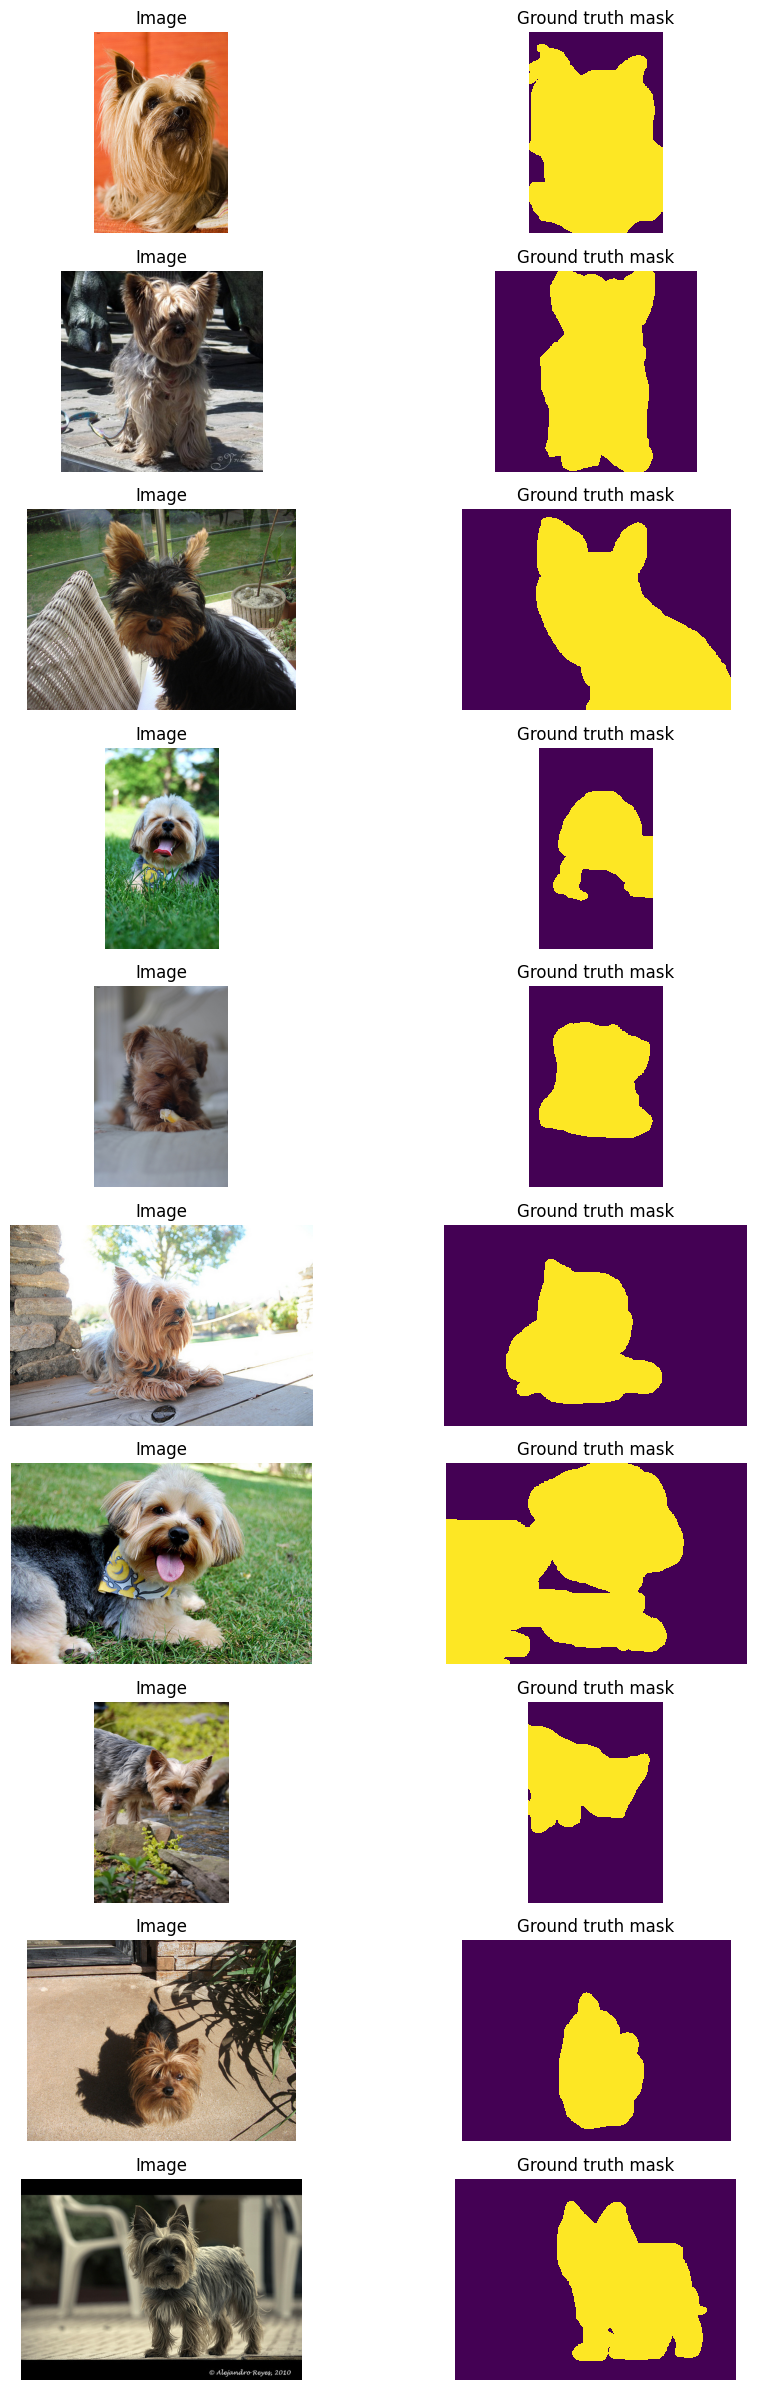

In [9]:
display_image_grid(test_images_filenames, images_directory, masks_directory)

## Dataset

In [10]:
class OxfordPetDataset(Dataset):
    def __init__(self, images_filenames, images_directory, masks_directory, transform=None):
        self.images_filenames = images_filenames
        self.images_directory = images_directory
        self.masks_directory = masks_directory
        self.transform = transform

    def __len__(self):
        return len(self.images_filenames)

    def __getitem__(self, idx):
        image_filename = self.images_filenames[idx]
        image = cv2.imread(os.path.join(self.images_directory, image_filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(
            os.path.join(self.masks_directory, image_filename.replace(".jpg", ".png")), cv2.IMREAD_UNCHANGED,
        )
        mask = preprocess_mask(mask)
        if self.transform is not None:
            transformed = self.transform(image=image, mask=mask)
            image = transformed["image"]
            mask = transformed["mask"]
        return image, mask

In [11]:
train_transform = A.Compose(
    [
        A.LongestMaxSize(512),
        A.PadIfNeeded(min_height=512, min_width=512),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
train_dataset = OxfordPetDataset(train_images_filenames, images_directory, masks_directory, transform=train_transform,)

val_transform = A.Compose(
    [
        A.LongestMaxSize(512),
        A.PadIfNeeded(min_height=512, min_width=512),
        # A.PadIfNeeded(min_height=512, min_width=512, border_mode=cv2.BORDER_CONSTANT),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
val_dataset = OxfordPetDataset(val_images_filenames, images_directory, masks_directory, transform=val_transform,)

In [12]:
def visualize_augmentations(dataset, idx=0, samples=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    figure, ax = plt.subplots(nrows=samples, ncols=2, figsize=(10, 24))
    for i in range(samples):
        image, mask = dataset[idx]
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(mask, interpolation="nearest")
        ax[i, 0].set_title("Augmented image")
        ax[i, 1].set_title("Augmented mask")
        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
    plt.tight_layout()
    plt.show()

In [13]:
random.seed(42)
visualize_augmentations(train_dataset, idx=55)

Output hidden; open in https://colab.research.google.com to view.

## Engine

In [14]:
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"], float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )

In [15]:
def train(train_loader, model, criterion, optimizer, epoch, params):
    metric_monitor = MetricMonitor()
    model.train()
    stream = tqdm(train_loader)
    for i, (images, target) in enumerate(stream, start=1):
        images = images.to(params["device"], non_blocking=True)
        target = target.to(params["device"], non_blocking=True)
        output = model(images).squeeze(1)
        loss = criterion(output, target)
        metric_monitor.update("Loss", loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        stream.set_description(
            "Epoch: {epoch}. Train.      {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
        )

In [16]:
def validate(val_loader, model, criterion, epoch, params):
    metric_monitor = MetricMonitor()
    model.eval()
    stream = tqdm(val_loader)
    with torch.no_grad():
        for i, (images, target) in enumerate(stream, start=1):
            images = images.to(params["device"], non_blocking=True)
            target = target.to(params["device"], non_blocking=True)
            output = model(images).squeeze(1)
            loss = criterion(output, target)
            metric_monitor.update("Loss", loss.item())
            stream.set_description(
                "Epoch: {epoch}. Validation. {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
            )

In [17]:
def train_and_validate(model, train_dataset, val_dataset, params):
    train_loader = DataLoader(
        train_dataset,
        batch_size=params["batch_size"],
        shuffle=True,
        num_workers=params["num_workers"],
        pin_memory=True,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=params["batch_size"],
        shuffle=False,
        num_workers=params["num_workers"],
        pin_memory=True,
    )
    criterion = nn.BCEWithLogitsLoss().to(params["device"])
    optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])
    for epoch in range(1, params["epochs"] + 1):
        train(train_loader, model, criterion, optimizer, epoch, params)
        validate(val_loader, model, criterion, epoch, params)
    return model

In [18]:
def predict(model, params, test_dataset, batch_size):
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=params["num_workers"], pin_memory=True,
    )
    model.eval()
    predictions = []
    with torch.no_grad():
        for images, (original_heights, original_widths) in test_loader:
            images = images.to(params["device"], non_blocking=True)
            output = model(images)
            probabilities = torch.sigmoid(output.squeeze(1))
            predicted_masks = (probabilities >= 0.5).float() * 1
            predicted_masks = predicted_masks.cpu().numpy()
            for predicted_mask, original_height, original_width in zip(
                predicted_masks, original_heights.numpy(), original_widths.numpy()
            ):
                predictions.append((predicted_mask, original_height, original_width))
    return predictions

## Model

In [19]:
def create_model(params):
    model = getattr(ternausnet.models, params["model"])(pretrained=True)
    model = model.to(params["device"])
    return model

## Training

In [20]:
params = {
    "model": "UNet11",
    "device": "cuda",
    "lr": 0.001,
    "batch_size": 8,
    "num_workers": 4,
    "epochs": 5 #10,
}

In [21]:
model = create_model(params)
model = train_and_validate(model, train_dataset, val_dataset, params)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:06<00:00, 78.5MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, 

## Prediction

In [22]:
class OxfordPetInferenceDataset(Dataset):
    def __init__(self, images_filenames, images_directory, transform=None):
        self.images_filenames = images_filenames
        self.images_directory = images_directory
        self.transform = transform

    def __len__(self):
        return len(self.images_filenames)

    def __getitem__(self, idx):
        image_filename = self.images_filenames[idx]
        image = cv2.imread(os.path.join(self.images_directory, image_filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_size = tuple(image.shape[:2])
        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]
        return image, original_size

In [23]:
test_transform = A.Compose(
    [A.Resize(256, 256), A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), ToTensorV2()]
)
test_dataset = OxfordPetInferenceDataset(test_images_filenames, images_directory, transform=test_transform,)

In [24]:
predictions = predict(model, params, test_dataset, batch_size=16)

In [29]:
predicted_masks = []
for predicted_256x256_mask, original_height, original_width in predictions:
    full_sized_mask = A.resize(
        predicted_256x256_mask, height=original_height, width=original_width, interpolation=cv2.INTER_NEAREST
    )
    predicted_masks.append(full_sized_mask)

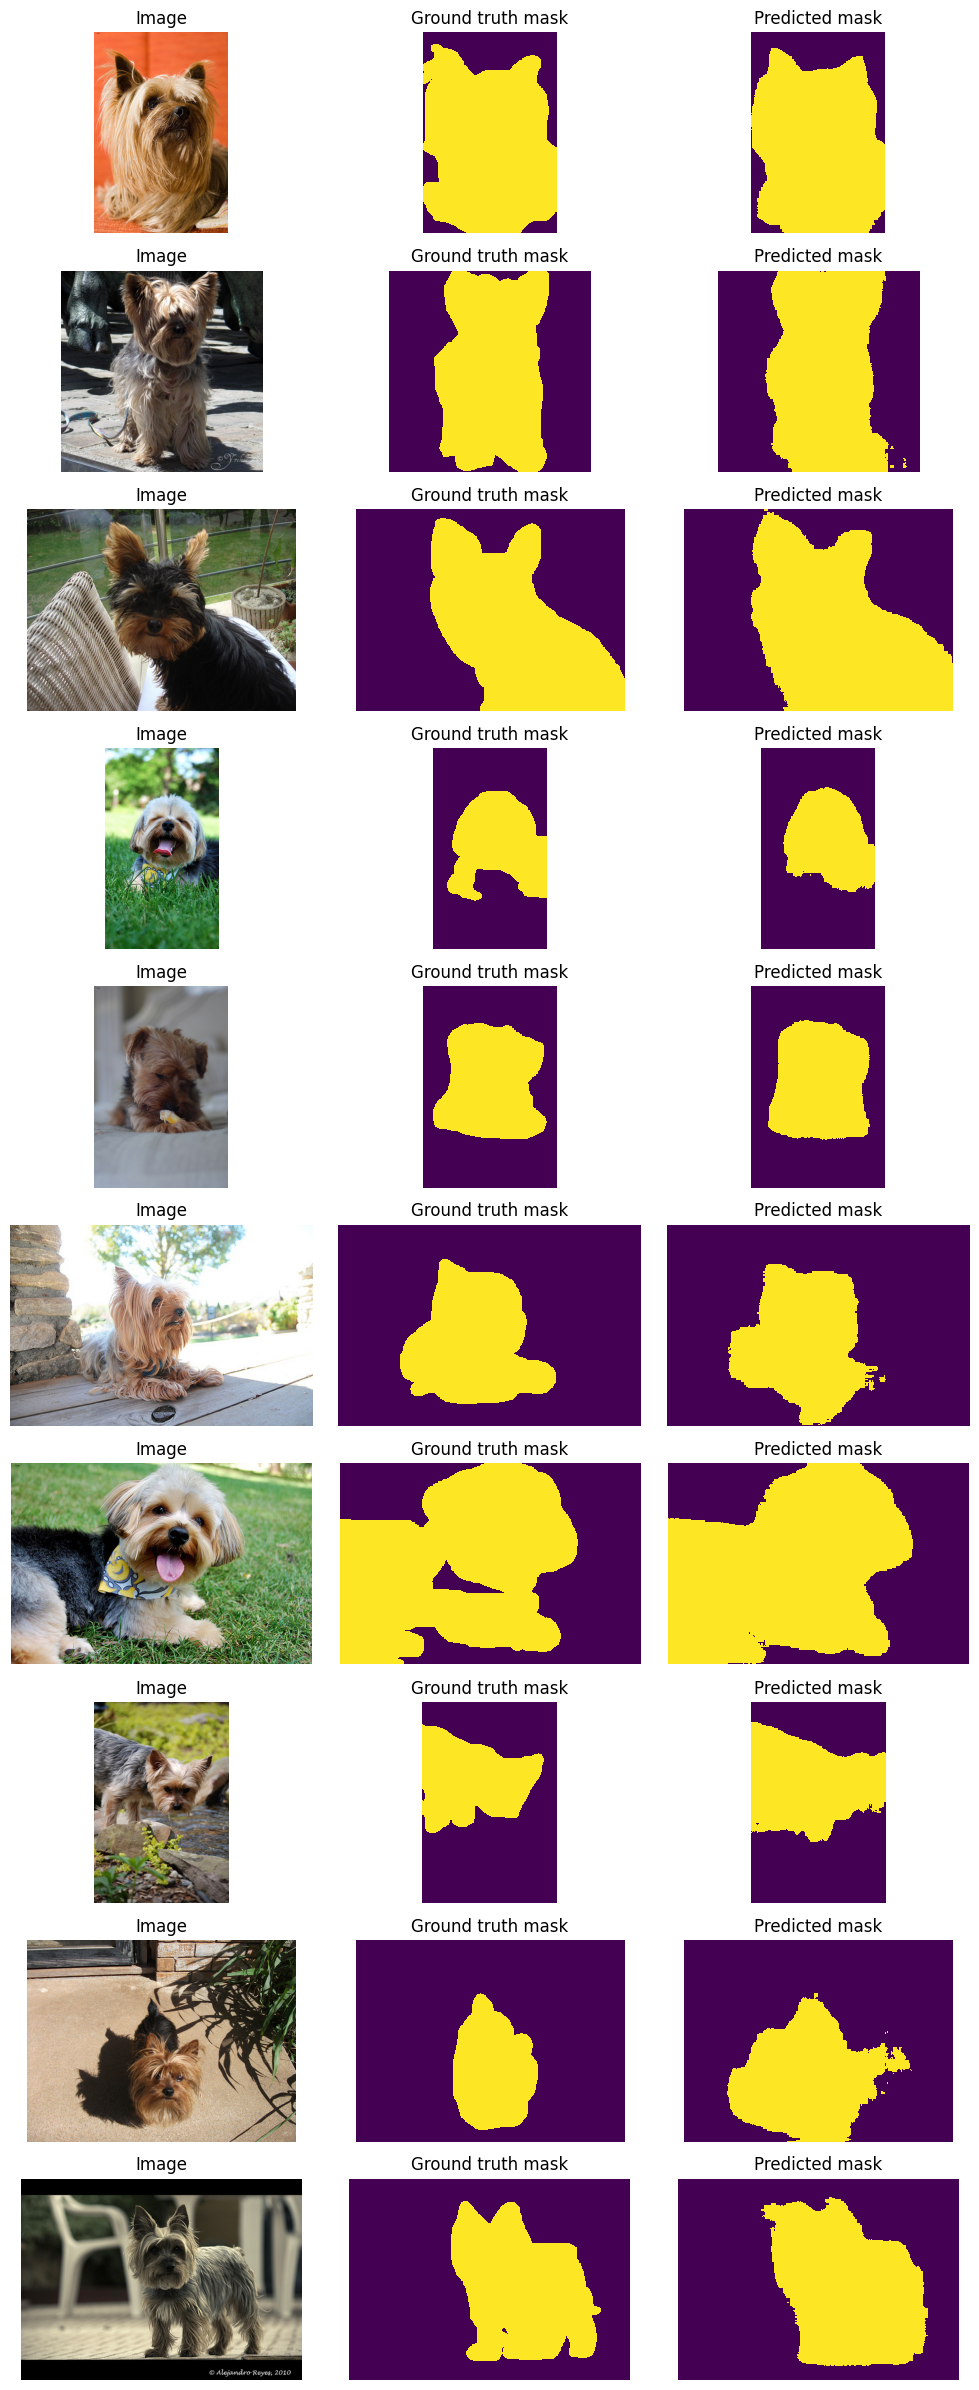

In [30]:
display_image_grid(test_images_filenames, images_directory, masks_directory, predicted_masks=predicted_masks)